# Analysis of Experimental Measurments

Once we gathered all the experimental data we were looking for it is time to put this information to use. 

However, prior to doing so, we need to understand the limitations of our data.  In previousl lectures, we discussed how to gather the information properly, using calibration, proper sampling, and noise reduction techniques. 

Now, we will try to put the information we obtained from the experiments in a different context, trying to answer questions such as:

1. Does the gathered data (based on a finite number of measurments) pose a good approximation for the population as a whole?
2. How can we represent the entire data set using a minimal set of values? 
3. How can we test the hypothesis we had prior to performing the experiment? 
4. Can we be sure that we will meet the required tolerances, given the scatter in our data?
5. Does it make sense at all?

> As you can guess, our focus will be on **random errors** and we will assume (for now) that we have eliminated all other sources of error we can think of. This assumption will of course ve tested during the analysis we will conduct. 



In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.ion()
%matplotlib inline
rcParams["figure.figsize"] = [12, 8]

### Probability 

We have previously used expressions such as:

$$
X \pm \mu
$$

where we reffered to $\mu$ as the uncertainty. Lets focus on that for a few minutes. 

What does an uncertainty of $\mu$ actually means? 

For simplicity let us consider a general case, where we are measuring a physical quantity $X$. When reporting the value of $X$ we actually report a probable value. In other words we will report something like:

$$
X=\bar{X}\pm \mu \ \ (T_{\mu})
$$

here, $X$ is what we are looking for, $\bar{X}$ is the most probable value for $X$ and $\pm \mu$ is the uncertainty interval with a probability $T_{\mu}$. 


Since we can (*almost*) never sample the entire population, we use the observations (sample) we have and try to draw conclusions from it. 

So when we reported $\bar{X}$ we were refering to the sample mean. 

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i
$$


That was simple. 

But, what does  $\pm \mu$ means and how do we associate it with $T_{\mu}$?

$\mu$ is the **sample** standard deviation, which we estimate by measuring the distance between our observations and the sample mean. 


$$
\mu = \left[ \frac{1}{n-1}\sum_{i=1}^n \left(X_i-\bar{X}\right )^2 \right]^{1/2}
$$

Before discussing how we obtain $T_{\mu}$ and why did we define $\mu$ the way we did, lets revise reall quick what you know from your course in probability and statistics. 

**Probability  function**  

Given a smapling space $\Omega$ of **discrete** values, the probability function $P$ maps each discrete value $x_i$ to a number between $0$ and $1$ such that $0 \leq P(x_i)\leq 1$ and $\sum_i P(x_i)  =1$ 

Without getting into details we will remind ourselves that :

1. $P(A \cup B) = P(A) +P(B) - P(A \cap B)$ 
2. $P(A|B) $ is the probability of $A$ given that $B$. $P(A|B)=\frac{P(A\cap B)}{P(B)}$
3. If $A$ is **independent** of $B$ than $P(A|B)=P(A)$ and $P(A \cap B) = P(A)\cdot P(B)$


We can ow recall **Bayes' rule**:

Given two events $A$ and $B$ we can write:

$$
P(B|A) = \frac{P(A|B)\cdot P(B)}{P(A)}
$$

The Bayes rule allow us to ask ourselves what is the probability of $B$ happening given that $A$ happens, from knowledge we have regarding the probability of $A$ occuring if $B$ happend. in other words it allows us to reverse the direction of the conditional probability. 

```{admonition} Example
We ordered a set of cooling elements from three  suppliers. (why?)
After inserting the units to production we found that some of the units lead to premature falure of our product due to extensive heating:

|Supplier |Fraction of stock |$P$ of failed units |
|:-: |:-:|:--|
|A|$P(A)=0.40$ | $P(F|A)=0.025$ | 
|B|$P(B)=0.25$ | $P(F|B)=0.05$ | 
|C|$P(C)=0.35$ | $P(F|C)=0.03$ | 

We now want to ask our selves what is the probability for a failed product to contain a unit manufactured in $A,B,C$? 

The answer is obtained using **Bayes rule**

First we can find $P(F)=P(F|A)P(A) + P(F|B)P(B) + P(F|C)P(C) = 0.033$  and now

$$
P(A|F) = \frac{P(F|A)\cdot P(A)}{P(F)}=\frac{0.025*0.4}{0.033} = 0.303\\
P(A|F) = \frac{P(F|A)\cdot P(A)}{P(F)}=\frac{0.05*0.25}{0.033} = 0.379\\
P(A|F) = \frac{P(F|A)\cdot P(A)}{P(F)}=\frac{0.03*0.35}{0.033} = 0.318
$$

**Remeber this example as we will revisit it soon when we try to decide which supplier is better for us**
```



To continue with our discussion on probability we will make a distinction between *discrete* and *continous* variables and distributions. 

#### Discrete variables
Given a discrete variable $X$ we can define $f(x)=P(X=x)$ with $f(x)$ being the probability mass function **PMF**. 

Lets take the first HW grade as our discrete variable. 

We plot the number of observations at each grade 

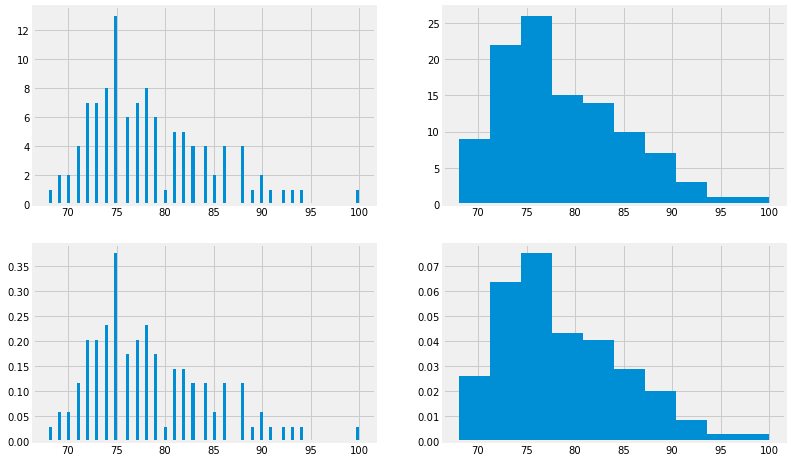

In [17]:
grades = pd.read_csv('../rep/grades.csv')

fig, axs = plt.subplots(2,2)

axs[0,0].hist(grades.HW1,bins=100, density=False);
axs[0,1].hist(grades.HW1,bins=10, density=False);
axs[1,0].hist(grades.HW1,bins=100, density=True);
axs[1,1].hist(grades.HW1,bins=10, density=True);


```{admonition} Question
- What is the difference between the 4 plots above?
- From which plot its easier for you to get a "feel" regarding the course grades?
```


Another way to visualize this data is to look at the **cumulative distribution function** or **CDF** 

The **CDF** is defined by $F(t)=P(X \leq t)$

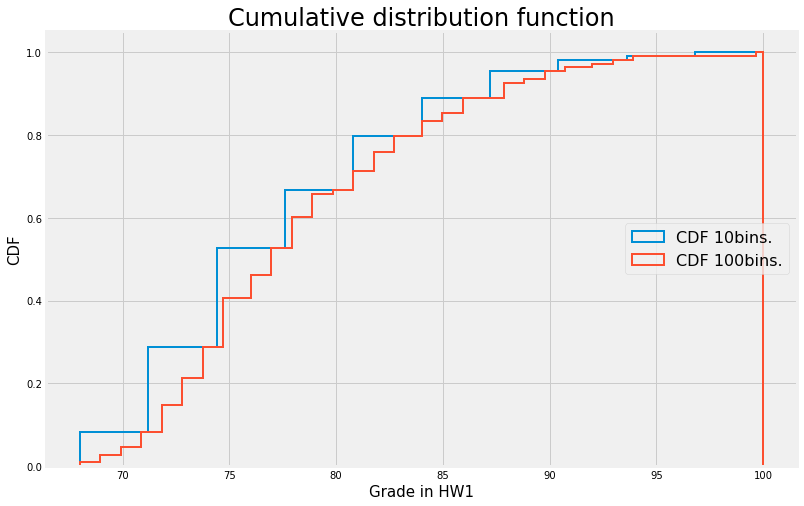

In [18]:
fig, ax = plt.subplots()
ax.hist(grades.HW1, bins=10, density=True, histtype='step', cumulative=1,
        label='CDF 10bins.', linewidth=2)
ax.hist(grades.HW1, bins=100, density=True, histtype='step', cumulative=1,
        label='CDF 100bins.',  linewidth=2)

ax.grid(True)
ax.legend(loc='right',fontsize=16)
ax.set_title('Cumulative distribution function',fontsize=24)
ax.set_xlabel('Grade in HW1',fontsize=15)
ax.set_ylabel('CDF',fontsize=15)

plt.show()


##### Not all distributions are born the same

**Bernoulli distribution** 

A Bernoulli distribution is such where the random variable can attain a value of $0$ or $1$ (e.g. pass or fail) . As such $P(X=1)=p$ and $P(x=0)=1-p$ 


**Binomial distribution**  $B(n,p)$

A binomial distribution answer the questions :

What is the probability to succedd in $n$ independent experiments where all of them are described by the Bernoulli distribution with $p$


**Hypergeometric distribution** 

Similar to the previous distributions, $x$ can take only two values. 

Here we are asking the question: Given that we check $n$ units out of a set of $N$ where $K$ units are not meeting the quality standards of our production line. What is the propability that we will check $x$ disqualified units?

$$
f(x)=\frac{\begin{pmatrix} K \\ x \end{pmatrix} \begin{pmatrix} N-K \\ n-x \end{pmatrix} }{\begin{pmatrix} N \\ n \end{pmatrix} }
$$

in case you forgot : $\begin{pmatrix} N \\ n \end{pmatrix}  = \frac{N!}{n!(N-n)!}$

**Poisson distribution**

Poisson distribution is used to describe the probability of $n$ events occuring over a given duration. 

the **PMF** of a Poisson random variable $X$ is 

$$
f(x)=\frac{e^{-\lambda}\lambda^x}{x!}
$$

where $\lambda = E(X)=Var(X)$ which is quite convinient :)

```{admonition} Example
Assume that a car manufacturer produces $9615$ cars per week. 
On avarage, $5$ cars a week are disqualified due to poor workmanship. 

- what is the probability that next week at least one car will be disqualified?
- what is the probability that next week no more than one car will be disqualified
- what is the probability that in the next 4 weeks more than 30 cars will be disqualified?

**At least one car**

We are looking for 
$$
P(X \geq 1)= 1-P(X=0) = 1-frac{\exp(-5)5^0}{0!} = 0.9933
$$

**Maximum one car**

$$
P(X\leq 1) = P(0)+P(1) = frac{\exp(-5)5^0}{0!} + frac{\exp(-5)5^1}{1!} = 0.0404
$$

**More than $30$ cars in the next $4$ weeks:**

SInce we only know the **weekly** probablity we need to define a new variable that will reffer to what happend over a duration of $4$ weeks. Lets call it $Y$ 

$$
\lambda_Y = \lambda_X * 4 = 20
$$

and we are looking for $P(Y>30)$ which is the same as $1-P(Y \leq 29)$
An we find that $P(Y>30)= 0.0218$ 

```

In [19]:
from scipy.stats import poisson
mu=5
P = poisson(mu)
print(1-P.pmf(0))
print(P.pmf(0)+P.pmf(1))
PY = poisson(mu*4)
print(1-PY.cdf(29))

0.9932620530009145
0.040427681994512805
0.02181821752555746


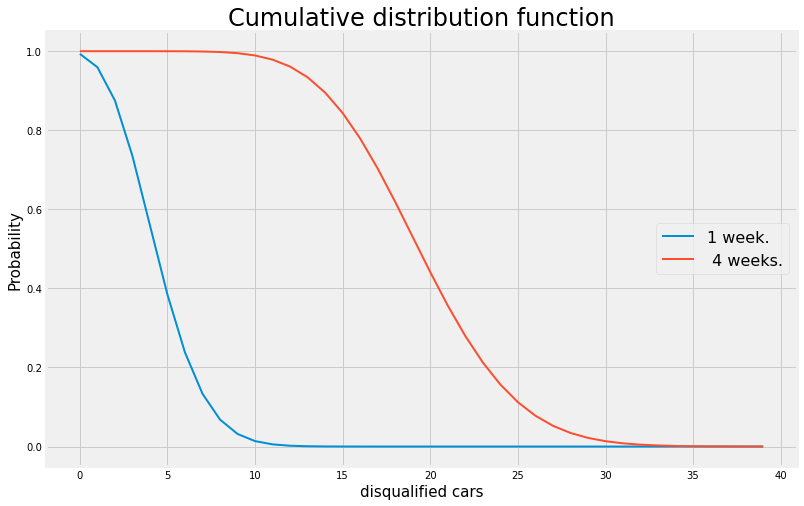

In [20]:
x=np.arange(0,40,1)

fig, ax = plt.subplots()
ax.plot(x,1-P.cdf(x), label='1 week.', linewidth=2)
ax.plot(x,1-PY.cdf(x), label=' 4 weeks.', linewidth=2)

ax.grid(True)
ax.legend(loc='right',fontsize=16)
ax.set_title('Cumulative distribution function',fontsize=24)
ax.set_xlabel('disqualified cars',fontsize=15)
ax.set_ylabel('Probability',fontsize=15)

plt.show()




#### The expectation value - characterizing the central tendency 

Now here it gets tricky. We are used to use $\mu$ for the uncerainty but in probability and statistics it is often used for describing the **mean* or **expectation value** 
we will use  $E(X)=\mu$ interchangably so keep it in mind. 

SO, the expectation value (or expected value) of a random discrete variable $X$ sampled $n$ times is given by 

$$ 
E(X)=\sum_{i=1}^N p(x_i)x_i
$$

- what is $E(X)$ for a Bernouli distribution?
- what is $E(X)$ for the binomial distribution?
- Can you find an expression for $E(Y)$ with $Y$ being a fnction of $X$?


The **sample mean** is calculated over our sampled data such that :

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$

#### The variance - characterizing the spread

The **population variance**, which a measure for how spread are the values of $X$ with respect to $E(X)$ is defined by:

$$
Var(X) = E((X-\mu)^2) = \sigma^2
$$

With $\sigma$ being the standard variation. (note: $Var(X+Y)=Var(X)+Var(Y)$ for independent $X,Y$ )

Similarly, the **sample variance** $s^2$ is defined over the set of samples we have :

$$
s=\sqrt{\frac{1}{n-1} \sum_{i=1}{n} \left( x_i - \bar{x} \right ) ^2}
$$

and $s$ is the standard deviation of the sample.


```{note}
both $\mu$ and $\sigma^2$ are moments . We will learn later on how to use moments and the functions used to generate them so that we can identify the probability mass function of our variable. 
```

#### Continous variables

A continous random variable $X$ can take infinite possible variables. 

Lets take as an example this list of defects extracted from a Ti6242 specimen manufactured via PBF-SLM. 

We will start by examining the number of voxels occupied by each defect

In [21]:
#read the data
Mct = pd.read_csv('../Rep/defects.csv')

Mct.head()

Radius [mm]  Diameter [mm]  Center x [mm]  Center y [mm]  Center z [mm]  \
0       0.0777         0.1554        -0.8663         2.7036         1.4228   
1       0.0530         0.1060        -1.2693         2.6135         5.5475   
2       0.0533         0.1066         2.0900         1.0270         2.5693   
3       0.0669         0.1338         4.0175        -1.2388        -4.0353   
4       0.0474         0.0949        -0.5736        -0.0857         4.1112   

   Volume [mm³]  Voxel  Surface [mm²]  Gap [mm]  Compactness  ...  \
0      0.000329    689         0.0545   -0.0348         0.17  ...   
1      0.000157    328         0.0269   -0.0023         0.25  ...   
2      0.000175    367         0.0291    0.1123         0.28  ...   
3      0.000175    366         0.0314    0.0052         0.14  ...   
4      0.000130    271         0.0237    0.1406         0.29  ...   

   Pos. x [mm]  Pos. y [mm]  Pos. z [mm]  Projected size x [mm]  \
0      -0.8595       2.7104       1.4193                 0.1446   
1      -1.2557       2.6173       5.5553                 0.1016   
2       2.0908       1.0160       2.5733                 0.0938   
3       4.0243      -1.2188      -4.0315                 0.0860   
4      -0.5721      -0.0812       4.1130                 0.0860   

   Projected size y [mm]  Projected size z [mm]   Label  \
0                 0.1251                 0.0782   53790   
1                 0.0938                 0.0547  110251   
2                 0.1094                 0.0547   71125   
3                 0.1290                 0.0625    8224   
4                 0.0938                 0.0547   88338   

   Projected area (yz-plane) [mm²]  Projected area (xz-plane) [mm²]  \
0                           0.0060                           0.0069   
1                           0.0034                           0.0037   
2                           0.0042                           0.0037   
3                           0.0045                           0.0038   
4                           0.0035                           0.0032   

   Projected area (xy-plane) [mm²]  
0                           0.0104  
1                           0.0057  
2                           0.0062  
3                           0.0064  
4                           0.0048  

[5 rows x 21 columns]

In [22]:
print('description of the number of voxels per defect','\n',Mct.Voxel.describe())

description of the number of voxels per defect 
 count    112048.000000
mean          1.409842
std           6.288546
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         689.000000
Name: Voxel, dtype: float64


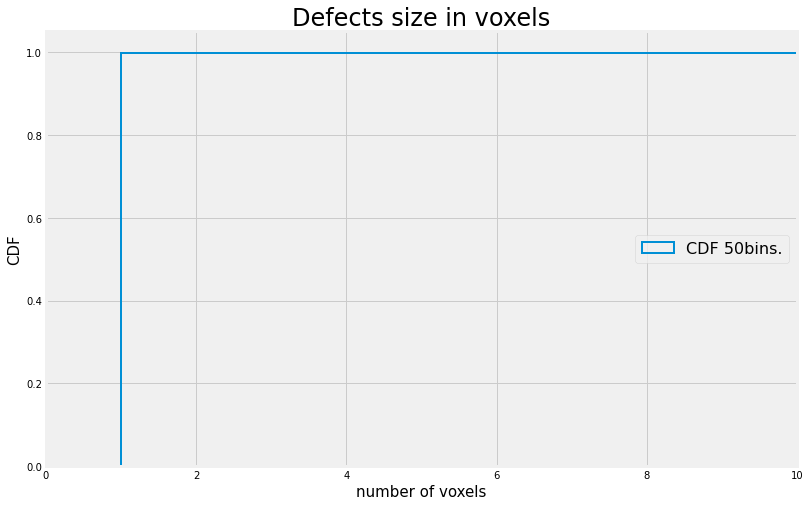

In [23]:
fig, ax = plt.subplots()
ax.hist(Mct.Voxel, bins=50, density=True, histtype='step', cumulative=1,
        label='CDF 50bins.', linewidth=2)

ax.grid(True)
ax.legend(loc='right',fontsize=16)
ax.set_title('Defects size in voxels',fontsize=24)
ax.set_xlabel('number of voxels',fontsize=15)
ax.set_ylabel('CDF',fontsize=15)
ax.set_xlim([0,10])

plt.show()

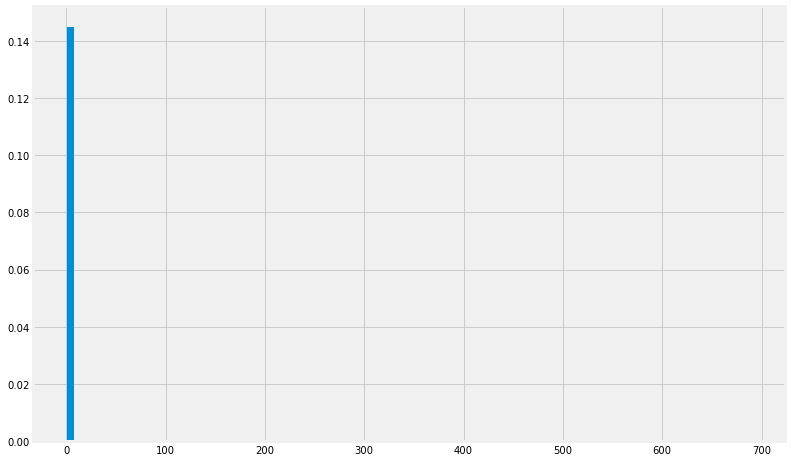

In [24]:
fig, axs = plt.subplots()

axs.hist(Mct.Voxel,bins=100, density=True);


In [25]:
#organize the headers
colnames=['Radius','Diameter','CenterX','CenterY','CenterZ','Volume','Voxel','Surface','Gap','Compactness',
'Sphericity','X','Y','Z','ProjectedX','ProjectedY','Projected','Label','ProjectedYZ','ProjectedXZ','ProjectedXY']
Mct.columns=colnames
#making things easier on the eye
Mct.set_index('Label')
Mct.sort_values(by='Label')
Mct['r']=Mct.apply(lambda row: np.sqrt(row.X*row.X+row.Y*row.Y),axis=1)
Mct.eval("theta = arctan2(X,Y)",  inplace=True)
Samp_vol =Mct.r.max() * Mct.r.max() *np.pi * (Mct.Z.max()-Mct.Z.min())
print('Estimated Sample Volume:', Samp_vol)
Mct.head()
Mctnew = Mct.drop(Mct[Mct.Voxel < 8].index).copy()

         

Estimated Sample Volume: 746.5442734136954


In [26]:
Mctnew.describe()

Radius    Diameter     CenterX     CenterY     CenterZ      Volume  \
count  415.000000  415.000000  415.000000  415.000000  415.000000  415.000000   
mean     0.027697    0.055395    0.067099    0.819863    0.064835    0.000028   
std      0.012050    0.024103    2.049289    1.988997    3.597330    0.000041   
min      0.012400    0.024700   -4.281100   -3.735600   -6.052800    0.000004   
25%      0.017500    0.035000   -1.518150   -0.916000   -2.698800    0.000005   
50%      0.024100    0.048200   -0.033500    1.129900    0.243600    0.000010   
75%      0.037200    0.074400    1.824800    2.590750    2.791850    0.000034   
max      0.077700    0.155400    4.265800    4.336400    6.038300    0.000329   

            Voxel     Surface         Gap  Compactness  ...           Z  \
count  415.000000  415.000000  415.000000   415.000000  ...  415.000000   
mean    58.959036    0.008039    0.007397     0.225398  ...    0.064916   
std     85.371118    0.007972    0.066483     0.094740  ...    3.597026   
min      8.000000    0.001700   -0.039700     0.050000  ...   -6.048900   
25%     11.000000    0.002400   -0.015700     0.150000  ...   -2.698650   
50%     22.000000    0.004300   -0.006700     0.200000  ...    0.239500   
75%     72.000000    0.011600    0.001250     0.280000  ...    2.794950   
max    689.000000    0.054500    0.593100     0.530000  ...    6.046100   

       ProjectedX  ProjectedY   Projected          Label  ProjectedYZ  \
count  415.000000  415.000000  415.000000     415.000000   415.000000   
mean     0.048505    0.046791    0.033359   47885.212048     0.001193   
std      0.022298    0.023096    0.013123   35446.875682     0.001038   
min      0.015600    0.011700    0.007800       1.000000     0.000200   
25%      0.031300    0.027400    0.023500   17948.000000     0.000500   
50%      0.043000    0.039100    0.031300   51432.000000     0.000700   
75%      0.064450    0.062500    0.039100   71367.000000     0.001600   
max      0.144600    0.129000    0.093800  111991.000000     0.006600   

       ProjectedXZ  ProjectedXY           r       theta  
count   415.000000   415.000000  415.000000  415.000000  
mean      0.001211     0.001430    2.789063   -0.038965  
std       0.001021     0.001448    1.016491    1.537667  
min       0.000200     0.000100    0.067113   -3.121345  
25%       0.000500     0.000400    2.143471   -0.959730  
50%       0.000800     0.000800    2.871200   -0.068222  
75%       0.001600     0.002050    3.626132    0.904677  
max       0.006900     0.010400    4.405642    3.133515  

[8 rows x 23 columns]

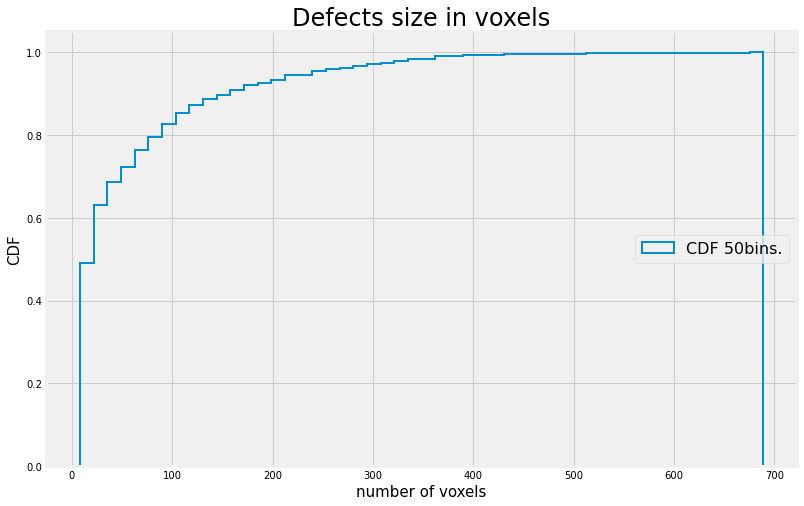

In [27]:
fig, ax = plt.subplots()
ax.hist(Mctnew.Voxel, bins=50, density=True, histtype='step', cumulative=1,
        label='CDF 50bins.', linewidth=2)

ax.grid(True)
ax.legend(loc='right',fontsize=16)
ax.set_title('Defects size in voxels',fontsize=24)
ax.set_xlabel('number of voxels',fontsize=15)
ax.set_ylabel('CDF',fontsize=15)


plt.show()

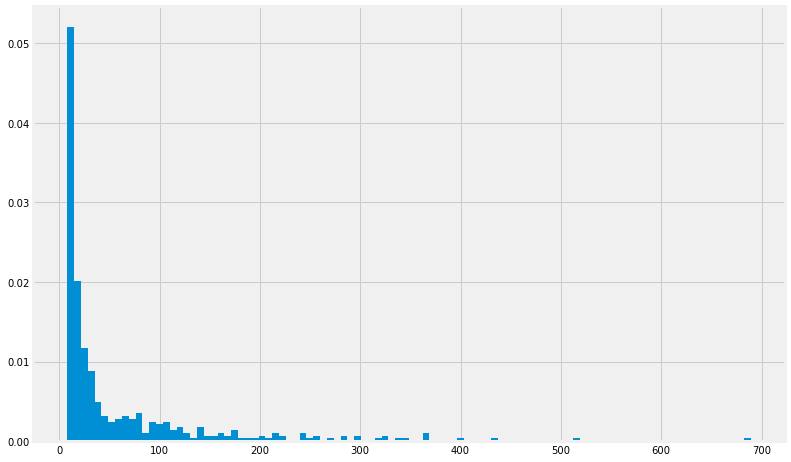

In [28]:
fig, axs = plt.subplots()

axs.hist(Mctnew.Voxel,bins=100, density=True);

>Now, this data doesnt seem to be following a normal distribution doesnt it?

Lets see what a normal distribution with the same mean and std woul look like:


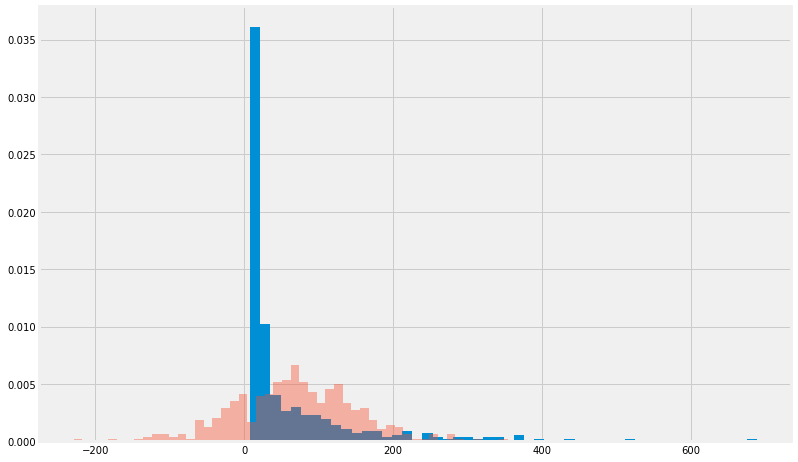

In [29]:
from scipy.stats import norm
mu = Mctnew.Voxel.mean()
Var = np.power(Mctnew.Voxel.std(),2)
sigma = Mctnew.Voxel.std()
Vox = norm(mu,sigma)
fig, axs = plt.subplots()

axs.hist(Mctnew.Voxel,bins=50, density=True,label='experimental data');
axs.hist(Vox.rvs(415),bins=50, density=True,alpha=0.4, label='Normal distribution');

**Here is the catch**

We usually assume that our random variable is distributed in a normal distribution. 

It has some advantages since it allows us to use $s$ in an intuitive manner and state that:

- $~68\%$ of the data lies between $\bar{x} \pm s$
- $~95\%$ of the data lies between $\bar{x} \pm 2s$
- $~99.7\%$ of the data lies between $\bar{x} \pm 3s$
- $3.4 X 10^{-5}$ of the data lies **outside**  $\bar{x} \pm 6s$ (the six-sigma methodology)

([<matplotlib.axis.XTick at 0x1986267aec8>,
 [Text(1, 0, 'Original'), Text(2, 0, 'Cleaned'), Text(3, 0, 'Normal')])

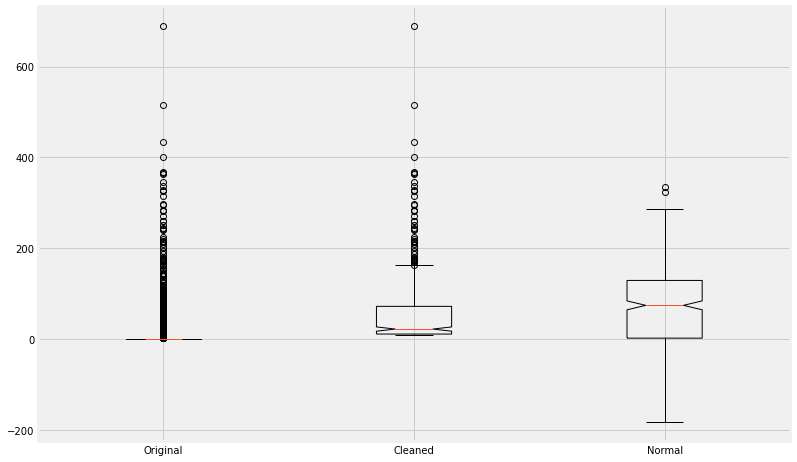

In [30]:
data=[Mct.Voxel, Mctnew.Voxel,Vox.rvs(415)]
plt.boxplot(data,notch=True);
plt.xticks([1,2,3],['Original','Cleaned','Normal'])

```{image} ../Rep/box.png
:alt: box schematic
:width: 600px
:align: center
```

Let us ignore the experimental data for a while and focus on the synthetic one.



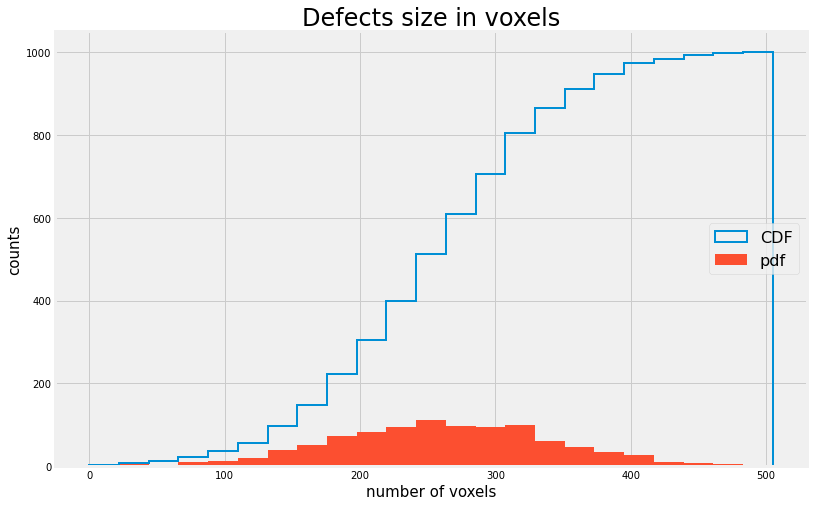

In [31]:
fig, ax = plt.subplots()
SDefects = Vox.rvs(1000)
SDefects=SDefects-SDefects.min()
ax.hist(SDefects,bins='auto', density=False, histtype='step', cumulative=1,
        label='CDF', linewidth=2)
ax.hist(SDefects,bins='auto', density=False, cumulative=0,
        label='pdf', linewidth=2)
ax.grid(True)
ax.legend(loc='right',fontsize=16)
ax.set_title('Defects size in voxels',fontsize=24)
ax.set_xlabel('number of voxels',fontsize=15)
ax.set_ylabel('counts',fontsize=15)


plt.show()



**If we trust the algorithm we used to generate the defects data than the cruves above should represent a Normal ditribution**

                
**<div style="color:red">                                    But how can we test that?</div>**

Assuming that the *theoretical* and *actual* probabilities are the same, we can rely on a simple and visual method to suppor our assumption:

**Quantile-Quantile plot**

The quantiles of each distribution should align with the other to form a straight line:

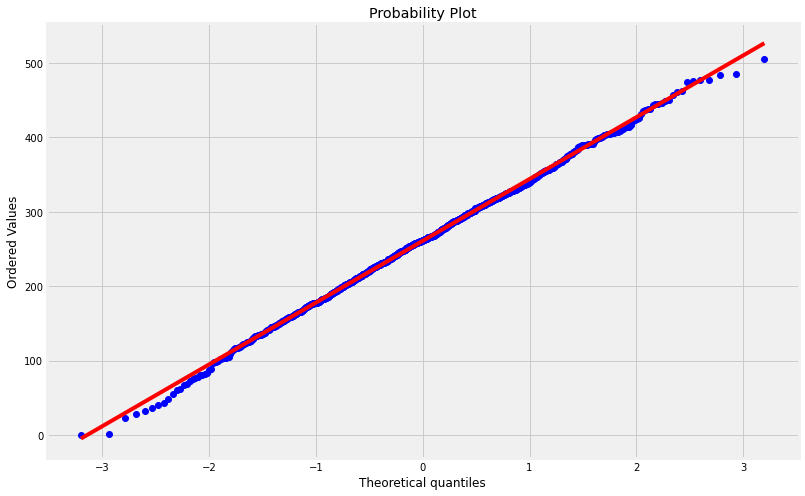

In [32]:
from scipy import stats

QQp=stats.probplot


QQp(SDefects,plot=plt);


We can do the same for the experimental data in case we are not convinced it is not following a normal distribution:


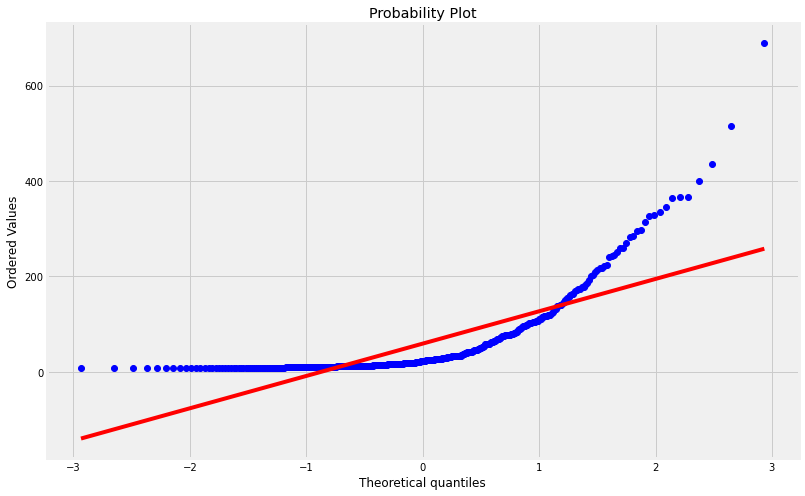

In [33]:
QQp(Mctnew.Voxel,plot=plt);



Or, if we try some other probability function, Lt's take gamma for example:


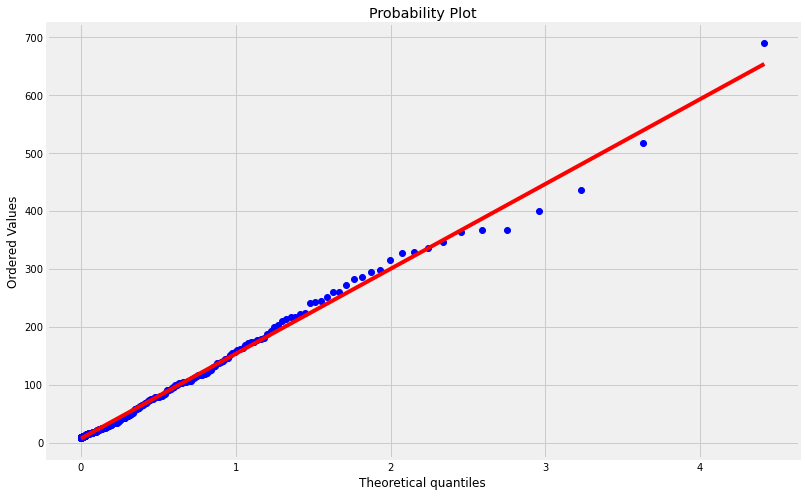

In [34]:
a,b,c= stats.gamma.fit(Mctnew.Voxel)
G=stats.gamma(a, b,c);
GamProb = G.rvs(size=415);
x=np.linspace(G.ppf(0.01),G.ppf(0.99), 100)
GPDF = G.pdf(x)
QQp(Mctnew.Voxel,plot=plt ,dist=stats.gamma(a));

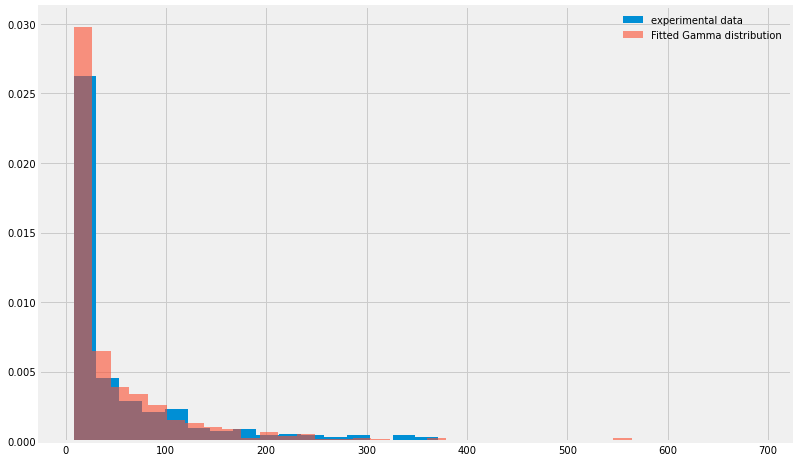

In [35]:
G=stats.gamma(a,b,c);
GamProb = G.rvs(size=415);
x=np.linspace(G.ppf(0.01),G.ppf(0.99), 100)
GPDF = G.pdf(x)

fig, axs = plt.subplots()

axs.hist(Mctnew.Voxel,bins=30, density=True,label='experimental data');
axs.hist(GamProb,bins=30,alpha=0.6,density=True,label='Fitted Gamma distribution');
axs.legend(loc='best', frameon=False)

plt.show()

#### Some common distributions 

##### Normal distribution 

We already met the *normal* distribution (*Gaussian*) which is commonly observed in many scenarios. This distribution is characterized by two parameters:  $\mu$ - mean (center) and  $\sigma$ -  standard deviation (spread)

A random variable $X$ with a normal distribution is written as:

$X ∼ N(\mu,\sigma)$

and 

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}}\exp \left [ -\frac{1}{2}\left ( \frac{x-\mu}{\sigma} \right ) ^2 \right ]
$$

Assumin $X$ is the number of cycles for failure in a fatigue test, and is characterized by $(\mu=21,\sigma=15)$



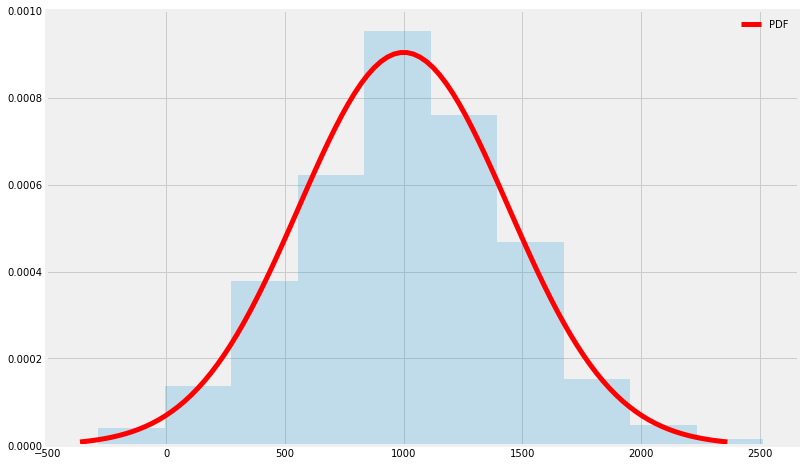

In [36]:
a=stats.norm(1000,21**2)

fig, ax = plt.subplots(1, 1)
x = np.linspace(a.ppf(0.001),
                a.ppf(0.999), 100)
ax.plot(x, a.pdf(x),
       'r-', lw=5, label='PDF')
       
CF = a.rvs(1000)
ax.hist(CF, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

**we can ask questions such as:**

- What is the probability of not failing after 100 cycles?

$P(X \gt 100) = 1-P(X \le 100) = 1-F(100) = 1- \int_{-\infty}^100 \frac{1}{21\sqrt{2 \pi}} \exp \left [ -\frac{1}{2}\left ( \frac{x-100}{21} \right ) ^2 \right ] $

In [37]:
print(1-a.cdf(10))

0.9876126580021647


- What is the number of cycles for which we have less than a $0.1$ probability of failure?


In [38]:
print(a.ppf(0.1))

434.8357595948312


I assume you all remember that we can standarize the normal distribution such that :

$Z = \frac{X-\mu}{\sigma}$ 

and obtain $Z~N(0,1)$

What does the follwoing tell us?

In [39]:
print(a.cdf(1100) - a.cdf(900) )

0.17938758566989427


##### Exponential distribution

Recall the Poisson distribution we discussed in the context of discrete variables. 

In that case we can state that $X$ is the number of failures in a week $(\lambda)$. 

A continous description can be formulated as the time until failure $T_x$. 

and the PDF & CDF of $t_x$ are given by :

$$
F(t_x) =1- \exp ^{-\lambda t_x} \\
\\ \ \ \\
f(t_x)=  \lambda\exp ^{-\lambda t_x}
$$

We will often use $\theta = \frac{1}{\lambda}$ such that $\theta$ will characterise the mean time until the first failure. 

and now, (going back to $x$ fr simplicity)

$$
f(x) = \frac{1}{\theta} \exp \left [ \frac{-x}{\theta} \right ]
$$

and :

$$
\mu = \theta \ \ ; \ \ \sigma = \theta
$$

So, if a failure occur at a mean rate of $49$ cars a week and we can consider it as a Poisson process,  what is the probability we will habe more than a day between failures?

$\lambda = 49/7 = 7$ cars a day  and $\theta = \frac{1}{7}$  $\Rightarrow$  $f(t_x) = 7\exp (-7 t_x)$


$P(t_x>1) = \exp(-7*1) = 0.0009$

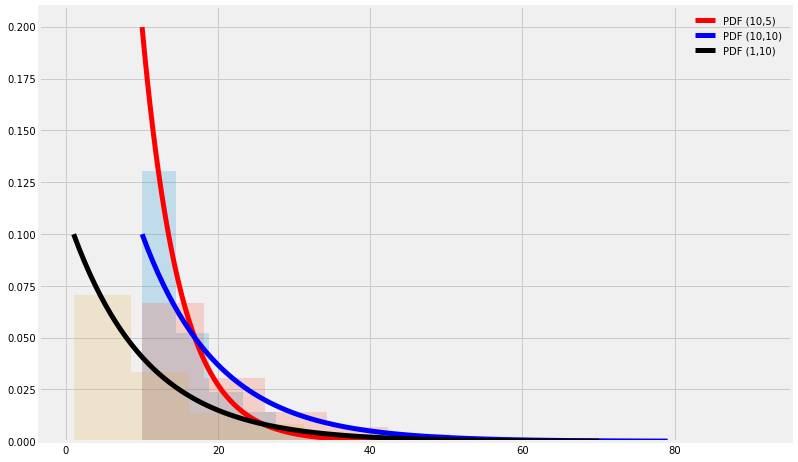

In [46]:
def Plot_exp(loc,scale):
    E=stats.expon(loc,scale)
    x = np.linspace(E.ppf(0.001),
                E.ppf(0.999), 100)
    CF = E.rvs(1000)
    return x,E.pdf(x),CF

    
fig, ax = plt.subplots(1, 1)
x,y,CF = Plot_exp(10,5)
ax.plot(x, y,'r-', lw=5, label='PDF (10,5)')
ax.hist(CF, density=True, histtype='stepfilled', alpha=0.2)

x,y,CF = Plot_exp(10,10)
ax.plot(x, y,'b-', lw=5, label='PDF (10,10)')
ax.hist(CF, density=True, histtype='stepfilled', alpha=0.2)

x,y,CF = Plot_exp(1,10)
ax.plot(x, y,'k-', lw=5, label='PDF (1,10)')
ax.hist(CF, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)
plt.show()



##### Exponential distribution $\to$ Gamma distribution

Now lets assume we wish to ask how much time we need to wait untile three cars break down. 

the $F$ (cdf) of the expoential distribution told us when the next event will happen. Looking for the $n^{th}$ event is similar to :

$F(t_x) = 1-\sum_{k=0}^{n-1} \frac{(\lambda t_x)^k\exp (-\lambda t_x)}{k!}$ 

After some simple manipulation, we can show that $f(t_x) = F`(t_x)$ is given by for integer $k$ values :

$$
f(t_x) = \frac{t_x^{k-1}}{(k-1)!\theta^k}\exp(-\frac{t_x }{\theta})
$$

and

$$
f(t_x) = \frac{t_x^{k-1}}{\Gamma(k)\theta^k}\exp(-\frac{t_x }{\theta}) \\
\\ \ \ \\
\Gamma(k) = \int_0^{\infty}y^{k-1}\exp(-y)dy
$$

otherwise. 

the mean is given by $\mu = k\theta$ and the variance $\sigma^2$ is calculated from $\sigma = \sqrt{k}\theta$

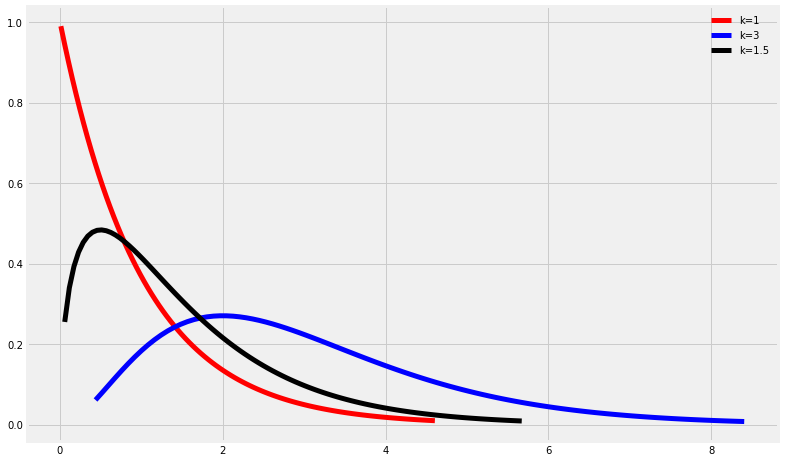

In [52]:
def get_gam(a):
    x = np.linspace(stats.gamma.ppf(0.01, a),
                stats.gamma.ppf(0.99, a), 100)
    y = stats.gamma(a)
    return(x,y)
                    

fig, ax = plt.subplots(1, 1)

x,y=get_gam(1)              
ax.plot(x, y.pdf(x),'r-', lw=5, label='k=1')

x,y=get_gam(3)              
ax.plot(x, y.pdf(x),'b-', lw=5, label='k=3')

x,y=get_gam(1.5)              
ax.plot(x, y.pdf(x),'k-', lw=5, label='k=1.5')

ax.legend(loc='best', frameon=False)
plt.show()



#### From Gamma $\to$ Chi-Square

If our continous random varible $X$ follow a gamma distribution with $\theta =2$ and $2k=r$ with $r$ being a positive integer : 



$$
f(x) = \frac{x^{r/2-1}}{\Gamma(\frac{r}{2})2^{r/2}}\exp(-\frac{x }{2})
$$

We will refer to it as a <div style="color:blue"> Chi-Square </div> distribution with $r$ dof. 

since it follows the gamma distribution the mean a variance of the Chi-Square are given by :

$$
\mu=E[X] =r \ \ \text{ and } \quad \sigma^2 = 2r
$$

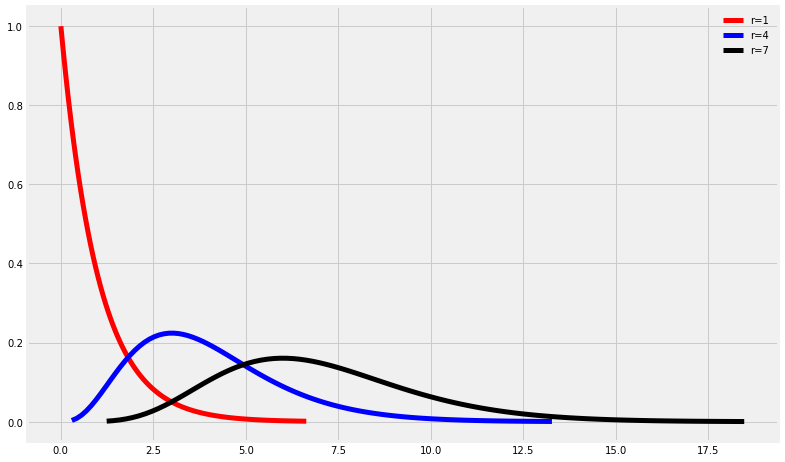

In [60]:
def get_chi2(dof):
    x = np.linspace(stats.chi2.ppf(0.01, dof),stats.chi2.ppf(0.99, dof), 100)
    y = stats.gamma(dof)
    return(x,y)
                    

fig, ax = plt.subplots(1, 1)

x,y=get_chi2(1)              
ax.plot(x, y.pdf(x),'r-', lw=5, label='r=1')

x,y=get_chi2(4)              
ax.plot(x, y.pdf(x),'b-', lw=5, label='r=4')

x,y=get_chi2(7)               
ax.plot(x, y.pdf(x),'k-', lw=5, label='r=7')

ax.legend(loc='best', frameon=False)
plt.show()



And if we are looking for the value of the random variable for which $P(X\le x) =0.75$ and we know that $r=7$ (black curve)  we obtain:

In [62]:
print('x=',stats.chi2.ppf(0.75, 7))

x= 9.037147547908143


Similarly, the probability that our random variable is greater than 12.5 is :

In [65]:
print('x=',1-stats.chi2.cdf(12.5,10))

x= 0.25298532330929824


### Statistical inference


When designing an experimental campaign we will, in many scenarios, aim at understanding a process or a phenomena or simply compare populations (e.g. different vendors) 

Let us examine the table below where the steady state pressure acting on a pressure vessel was measured at three different labs, 108 times for each lab:

In [53]:
PresMax = pd.read_csv('../rep/PressureMax.csv')
PresMax.describe()

LocU         LocM        LocD
count  108.000000   108.000000  108.000000
mean   848.207680   932.301881  850.186908
std     24.866816    75.941999   35.216735
min    800.108198   718.892815  767.670008
25%    827.704051   888.556853  826.034777
50%    846.506359   924.015280  850.758706
75%    865.025943   984.351980  873.589351
max    927.304354  1157.256599  939.918922

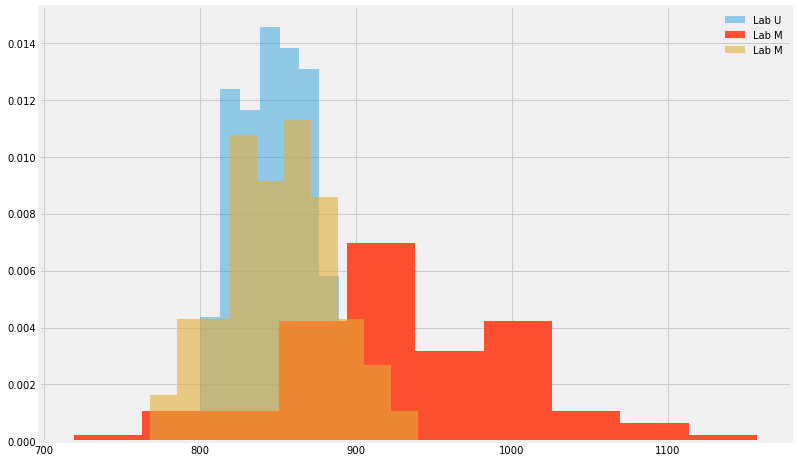

In [55]:
fig, ax = plt.subplots(1, 1)
ax.hist(PresMax.LocU, density=True, histtype='stepfilled', alpha=0.4,label='Lab U')
ax.hist(PresMax.LocM, density=True, histtype='stepfilled', label='Lab M')
ax.hist(PresMax.LocD, density=True, histtype='stepfilled',alpha=0.6,label='Lab M')
ax.legend(loc='best', frameon=False)
plt.show()

#### Sampling variats

for $n$ which is not sufficiently large, we will use 

$$
t=\frac{\sqrt{n} (\bar{x}-\mu)}{s}
$$

in which $n$ is the *DOF*. 

We will frequently be interested in the variations between the observable and not it mean. in those situations, we will resort to the **Chi-Square** dsitribution desribed above where:

$$
X^2 = \frac{s^2}{\sigma^2} (n-1) 
$$ 

is the variate of interest. 


When comparing the variation between two processes or populations, we will often use the *F-variate* dfined as :

$$
F = \frac{s_1^2\sigma_2^2}{s_2^2 \sigma_1^2}
$$

where the sample standard deviation $s$ of each popoulation/process contains the information regarding the number of samples. 

#### Law(s) of large Numbers

1. Assume $X_i$ to be a set of measurements (independent random variables identically distributed) for which the expectation value is $E[X_i]=\mu$ and $\bar{X}=\frac{1}{n}\sum_i=1^nX_i$ , assuming a finite variance we can show that for sufficiently large $n$ we will obtain $\bar{X} \to \mu$ 

2.  With $X$ being the same set of measurements as before, and $\mu = E[X_i] <\infty$ then $\bar{X} \to \mu$ for sufficiently large $n$. 

$n$ can be estimated using $\sum\frac{\sigma_i^2}{i^2}$

#### Central limit theorem

Assumin that $\bar{X}$ is the mean of $X$ over $n$ measurements, for a sufficiently large $n$ we can show that 

$$
Z_n=\frac{\sqrt{n}}{\sigma}\left ( \bar{X}-\mu \right )
$$

Approaches $N(0,1)$ as n increases.  

Coming back to our example regarding the pressure data, looking at the sample mean of the **U** location we observe it to be $848.21$. But what does it tell us?

Using the standard error we can test how precise the estimator is. 

#### Inference on a mean

writing the measured response as 

$$
y_i = \mu + e_i
$$

it means that $\bar{y}$ (the sample mean) is an estimator of the population mean $\mu$ 

Assuming that the errors $e_i$ are independent on eachother and normally distributed (as is often the case with random errors). 

looking back on the *t-distribution* 

$$
t = \frac{(\bar{y}-\mu)\sqrt{n}}{s}
$$

Starting with :

$$
P[-t_{\alpha/2} < t < t_{\alpha/2}] = 1-\alpha
$$

and doing some algebra we obtain :

$$
\bar{y} \pm t_{\alpha/2}s
$$

which translates into the statement that: 

**we are $1-\alpha$ % sure that our confidience limits cover the unknown $\mu$ of the population mean.**

looking at our examples we can find the 95% C.I for each location :

In [29]:
def print_CI(alpha, colName, dof):
    CIL = PresMax[colName].mean() -stats.t.ppf(1-alpha/2,df=107)*PresMax[colName].std()
    CIU = PresMax[colName].mean() -stats.t.ppf(alpha/2,df=107)*PresMax[colName].std()
    print ('For location',colName, 'the 95% CI is between ', CIL, 'and',CIU ,'and the sample mean is ',PresMax[colName].mean()) 
    

In [30]:
for colName in PresMax.columns:
    print_CI(0.05,colName,107)


For location LocU the 95% CI is between  798.9121173491465 and 897.5032419952981 and the sample mean is  848.2076796722223
For location LocM the 95% CI is between  781.7557248710715 and 1082.8480377178173 and the sample mean is  932.3018812944443
For location LocD the 95% CI is between  780.3738389715376 and 919.9999780136478 and the sample mean is  850.1869084925927


##### Hypothesis 

Now lets test the hypothesis that the mean pressure in *LocU* is $825$

Our null hypothesis is 

$$
H_0: \mu = 825
$$

And the alternative is

$$
H_a: \mu \ne 825
$$

using the *t* statistic we can formulate a decision rule:

**Reject** $ t>t_{\alpha/2} \ \ \text{or} \ \ t<t_{-\alpha/2}$

for *LocU* $t=0.745$ and $t_{\alpha/2} = 1.982$


We can estimate $n$ for a given $CI$ as:

$$
n = \left ( \frac{2 z_{\alpha /2} \sigma}{L} \right ) ^2 
$$

```{admonition} How to compare the results from the different labs?

You were asked to conduct the experiment and report back if the new lab (LocM) is reliable

What will you say?
```

**Welsch's t-test**

We can test if the results we obtained from the three independent labs represent the same mean (what is the meaning of population here?) 

$$
t= \frac{\bar{X_1}-\bar{X_2}}{s_{w}}
$$

$$
s_{w} = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n2}}
$$

For LocU and LocD:

In [37]:
res = stats.ttest_ind(PresMax['LocU'],PresMax['LocD'], equal_var =False)
print('p-value is ',res.pvalue)

p-value is  0.6338258372488789


For LocU and LocM:

In [38]:
res = stats.ttest_ind(PresMax['LocU'],PresMax['LocM'], equal_var =False)
print('p-value is ',res.pvalue)

p-value is  3.9546450355445506e-20


#### Confidence intervals for the variance


The sample variance of $x$ is given by :

$$
s^2 = \frac{1}{n-1}\sum_i (x_i -\bar{x})^2
$$. 

since we alreday claimed that we can construct a variate $X$ which will follow a Chi-Square distribution :

$$
X^2=(n-1) \left(\frac{s}{\sigma}\right )^2
$$

we can state that :

$$
P \left [ X^2_{1-\alpha/2} < (n-1) \left(\frac{s}{\sigma}\right )^2 <  X^2_{\alpha/2} \right ]=1-\alpha
$$ 

which will lead to 

$$
P \left [ \frac{(n-1)s^2}{X^2_{\alpha/2}} < \sigma^2 <  \frac{(n-1) s^2}{X^2_{1-\alpha/2}}\right ]=1-\alpha
$$

and thus we now have a way of declaring the CI over $\sigma^2$ with 100(1-\alpha)% :

$$
 \sqrt{\frac{(n-1)s^2}{X^2_{\alpha/2}} }< \sigma <  \sqrt{\frac{(n-1) s^2}{X^2_{1-\alpha/2}}}
$$



The hypothesis below may be used to check if the variance in the measurments of lab LocU us $\sigma_0^2$

$H_0 : \sigma_{LocU} = \sigma_{0}$

$H_{alt} : \sigma_{LocU} \ne \sigma_{0}$

**However, we need to take one more step so that we can test if the data from the three labs has the same variance:**


Using the $F$ variate we defined before :

$$
\frac{s_1^2}{s_2^2F_{\alpha/2}} < \left( \frac{\sigma_1}{\sigma_2} \right )^2 <\frac{s_1^2}{s_2^2F_{1-\alpha/2}}
$$

**Note that we have considered all of our measurments to arise from the same population of pressure vessels, otherwise we would have taken a different route.**

```{admonition} Question
Assume the maximum allowed pressure is 900MPa 

How will you go about deciding should you use the current design for operational pressure vessels?
```

#### Linear regression


A linear regression model will assume the form of :

$$ 
y_i = a_0 +a_1x_i + e_i
$$

where $x_i$ can be alinear or non-linear functn of another predictor (you will find that $x=ln(z)$ is bein used quite often). 

and is based on the assumptions that :

1. The $y$ is indeed dependent on $x$ in a linear manner (or it is a good approximation) in the range of interest

2. $x$ is measured withot (?) an error. 

3. $e_i ~N(0,\sigma)$ with a constant variance.  

### To be continued


#### What to do when we have two variabales?

##### Covariance and Correlation

$$
\text{Cov}(X,Y) = E[(X-\mu_x)(Y-\mu_y)]  = \int \int (x-\mu_x)(y-\mu_y)f(x,y)dxdy  =E[XY]-\mu_X\mu_Y =\sigma_{XY} \\
\\ \ \ \\
\text{Corr}(X,Y) = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}
$$


```{admonition} Question
What can you tell me about $\text{Corr}(X,Y)$ ?
```



##### Joint probability  ($X,Y \to $random variables) 

The join probability density is given by :

$$
P(X,Y) = \int \int f(x,y)dxdy
$$

So, lets think of it as an area measure. 

Now, it simple to find things like $P(X<10,10<Y<50)$ or $P(X>Y)$ right?

We can define the marginal pdf of each variable following 

$$
f_X(x) = \int f(x,y)dy
$$

and their expectaction value :

$$
E[X]=\int \int xf(x,y)dxdy
$$


we can even use $f_X(x),f_Y(y)$ to check if two variables are depndent or not by asking :


$$
f(x,y)=f_X(x)f_Y(y) ???
$$

##### Conditional probability

**What is the probability of X for Y=y?**

$$
h(x|y)=\frac{f(x,y)}{f_X(x)}
$$


$$
E[X|y]=\int xh(x|y)dy
$$

$$
\text{Var}(X|y) = E[X^2|y]-[E(X|y)]^2
$$


For a normal distribution  and for a linear expectation value of $X$ given $y$  in which the conditional variance does not depend on the value of $x$ this translate into:

$$
(X|Y=y)~N \left ( \mu_X + \rho\frac{\sigma_Y}{\sigma_X}(Y-\mu_Y) \ \ , \ \ \sigma_X^2 (1-\rho^2) \right ) 
$$

When both $X$ and $Y$ are normally distributed we can write the joint probability density function as:

$$
f(x,y)=\frac{1}{2\pi \sigma_X \sigma_Y \sqrt{1-\rho}}\exp \left ( -\frac{1}{2}q(x,y) \right ) \\
\\ \ \ \\
q(x,y) = \frac{1}{1-\rho^2} \left [ \left( \frac{X-\mu_X}{\sigma_X} \right )^2 + \left( \frac{Y-\mu_Y}{\sigma_Y} \right )^2 - 2 \rho \frac{X-\mu_X}{\sigma_X}\frac{Y-\mu_Y}{\sigma_Y} \right ] 
$$



### To be continued
